<a href="https://colab.research.google.com/github/Chantrey1972/ProyectoM6_Procesamiento-de-Lenguaje-Natural/blob/main/ENTREGABLE_Chantrey_Bruzzo_Duncan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivos
- Aplicar el análisis de sentimientos a datos de la vida real.
- Realizar la recolección y análisis de sentimientos con las herramientas de Python.
- Generar diferentes gráficas que ayuden a entender los sentimientos generales del _dataset_.

## Proyecto
Usarás el _dataset_ -> https://www.kaggle.com/datasets/kazanova/sentiment140, que tiene más de 1.6 millones de tuits extraídos con la API de Twitter, para realizar lo siguiente:


1. Hacer todo el preprocesamiento de datos, que incluye:
  - Quitar valores nulos
  - Remover los URL de los tuits
  - Remover números
  - Quitar signos de puntuación
  - Eliminar las palabras de parada

2. Generar una gráfica y una nube de palabras de acuerdo con el _target_ del tuit.

3. Realizar la vectorización de los textos y justificar la elección del vectorizador y optimizador.

4. Entrenar un modelo de clasificación, graficar la matriz de confusión, imprimir la precisión y hacer una prueba con un texto que tú escribas.
  - Puedes seleccionar el vectorizador y los optimizadores de tu preferencia.

5. Entrenar el modelo con un segundo algoritmo de clasificación de tu elección y **escribir** las conclusiones de tus resultados.

  - Debes graficar la matriz de confusión, imprimir la precisión y hacer una prueba en un texto con el nuevo modelo.

**NOTA:** Puedes reducir el tamaño del _dataset_ según tu criterio, con el fin de reducir el tiempo de ejecución o evitar que el COLAB se detenga debido al consumo de RAM.

Mucho éxito y recuerda que en las asesorías semanales e individuales tu _coach_ te ayudará con el proyecto.

## Criterios de evaluación

| Actividad | Porcentaje | Observaciones |
| -- | -- | -- |
| Actividad 1. Limpieza | 20 | Realiza las siguientes actividades en el _dataset_: quitar valores nulos. Remover las URL de los tuits. Remover números. Quitar signos de puntuación. Eliminar las palabras de parada.|
| Actividad 2. Análisis inicial | 20 | Debes generar una gráfica con leyendas y títulos adecuados para ser leídos por una persona que no sea del área. Además, debes realizar una nube de palabras por cada sentimiento _target_ que tiene el _dataset_.
| Actividad 3. Vectorización | 20 | Para entrenar el modelo de ML, el texto debe estar vectorizado, por ello, debes realizar la vectorización y justificar tus elecciones. Sin las justificaciones, se descontarán puntos. |
| Actividad 4. Entrenamiento 1 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |
| Actividad 5. Entrenamiento 2 | 20 | Esta sección debe tener las gráficas adecuadas del entrenamiento, con leyendas y títulos correspondientes, la matriz de confusión graficada y explicada, así como la impresión de métricas de performance del modelo elegido. |


# **EJECUCION**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/UDD CIENCIAS DE DATOS/MODULO 6 PROCESAMIENTO DE LENGUAJE NATURAL/PROYECTO/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [ ]:
df.shape

(1600000, 6)

In [ ]:
df.columns

Index(['target', 'id', 'date', 'flag', 'user', 'text'], dtype='object')

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
df['target'] = df['target'].map({0:0, 4:1})

In [ ]:
df.target.value_counts()

,count
target,
0,800000
1,800000


<Figure size 1000x600 with 0 Axes>

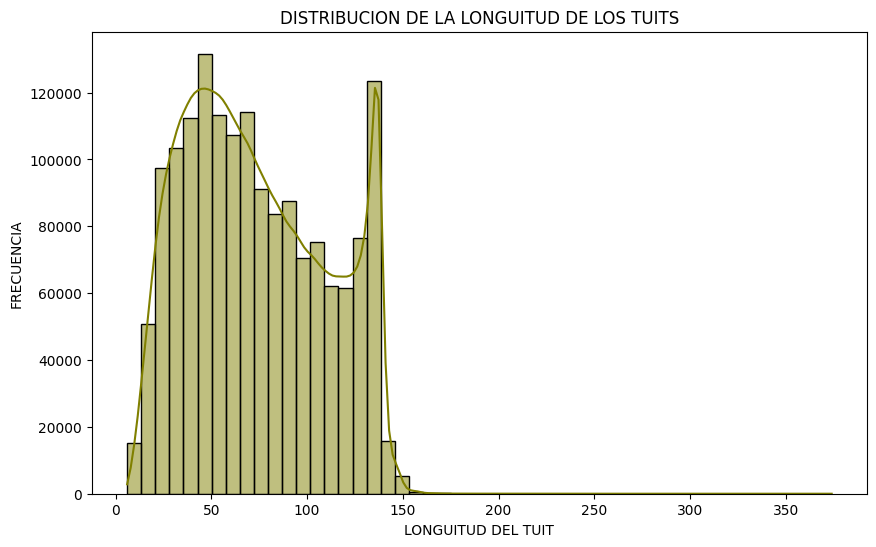

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna con la longitud de cada tuit
df['tweet_length'] = df['text'].apply(len)


plt.figure(figsize=(10, 6))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna con la longitud de cada tuit
df['tweet_length'] = df['text'].apply(len)


plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=50, kde=True, color='olive')
plt.title('DISTRIBUCION DE LA LONGUITUD DE LOS TUITS')
plt.xlabel('LONGUITUD DEL TUIT')
plt.ylabel('FRECUENCIA')
plt.show()


**Interpretación:**

- La mayoría de los tuits parecen tener una longitud entre 20 y 150 caracteres.

**Hay dos picos principales en la distribución:**

- Uno alrededor de los 50 caracteres, lo que sugiere que muchos tuits tienen esta longitud.
- Otro pico cerca de los 140 caracteres, probablemente porque este es el límite original de caracteres en Twitter (antes de que se ampliara a 280 caracteres), lo que hace que muchos usuarios aprovechen al máximo el límite.

- La distribución decae rápidamente después de los 150 caracteres, lo que indica que son menos comunes los tuits con una longitud mayor, aunque todavía hay algunos.

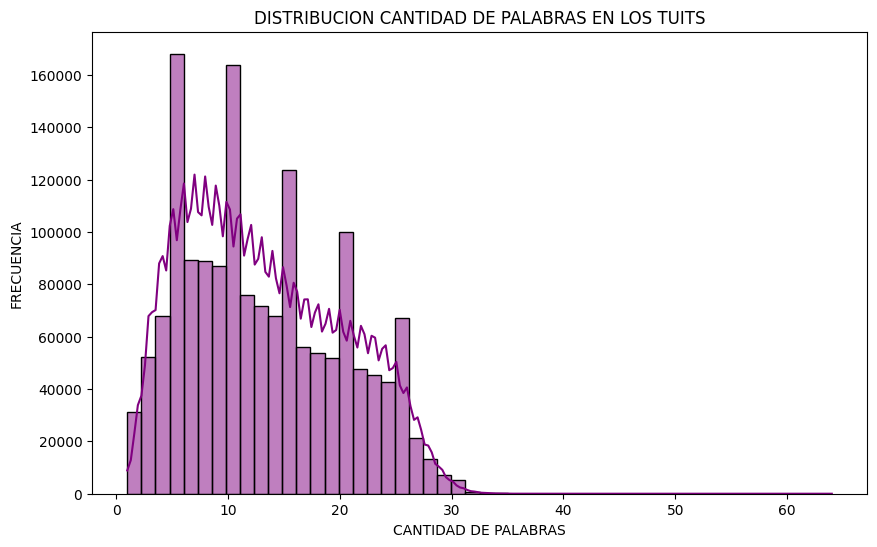

In [ ]:
# Contar las palabras en cada tuit
df['word_count'] = df['text'].apply(lambda x: len(x.split()))


plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='purple')
plt.title('DISTRIBUCION CANTIDAD DE PALABRAS EN LOS TUITS')
plt.xlabel('CANTIDAD DE PALABRAS')
plt.ylabel('FRECUENCIA')
plt.show()


**Interpretación:**

- La mayoría de los tuits tienen entre 5 y 15 palabras, como se observa en la zona más alta de las barras.

- Hay varios picos pequeños en la distribución, lo que podría deberse a diferentes estilos de escritura o tipos de tuits, pero el mayor número de tuits contiene alrededor de 10 palabras.

- Después de las 20 palabras, la frecuencia comienza a disminuir drásticamente, lo que sugiere que es mucho menos común encontrar tuits con más de 20 palabras.

- La distribución tiene una cola larga hacia la derecha, lo que indica que hay algunos tuits que contienen un número mucho mayor de palabras, aunque son menos frecuentes.

En resumen, este gráfico muestra que los tuits suelen ser cortos en términos de cantidad de palabras, con un promedio en torno a las 10 palabras, y es raro encontrar tuits con más de 30 palabras.

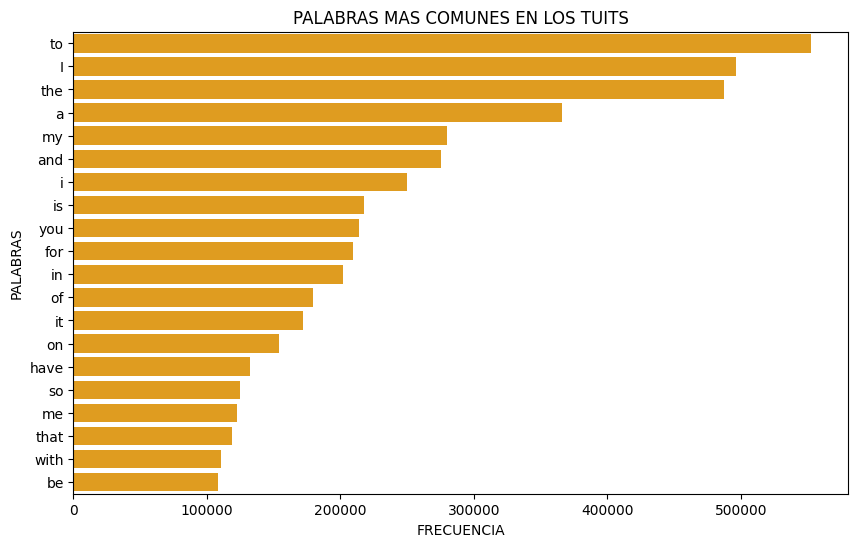

In [ ]:
from collections import Counter

# Contar las palabras más comunes
all_words = ' '.join(df['text']).split()
word_freq = Counter(all_words)

# Mostrar las 20 palabras más comunes
common_words = word_freq.most_common(20)

words, counts = zip(*common_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), color='orange')
plt.title('PALABRAS MAS COMUNES EN LOS TUITS')
plt.xlabel('FRECUENCIA')
plt.ylabel('PALABRAS')
plt.show()

**Interpretación**

**Palabras funcionales:** Las palabras más comunes son principalmente artículos, preposiciones y conjunciones. Estas palabras son fundamentales para construir oraciones pero no aportan mucho significado por sí solas.

**Pronombres personales:** También aparecen con mucha frecuencia, lo que refleja la naturaleza personal y conversacional de los tweets.

**Palabras cortas y sencillas:** En general, las palabras más utilizadas son cortas y sencillas. Esto se debe a que los usuarios de Twitter suelen escribir mensajes concisos.

Qué significa esto?

**Patrones lingüísticos:** El gráfico nos revela patrones interesantes sobre cómo se utiliza el lenguaje en Twitter.
Contenido de los tweets: Si bien las palabras más comunes no nos dicen mucho sobre los temas de los tweets, sí nos dan una idea de la estructura y el estilo de los mensajes.

<ipython-input-13-f9563a53cb50>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='tweet_length', data=df, palette='Set2')


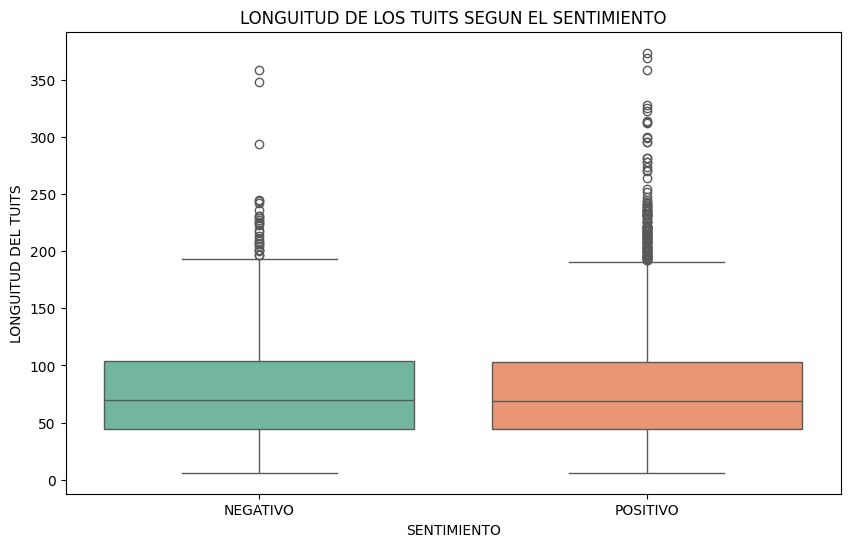

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='tweet_length', data=df, palette='Set2')
plt.title('LONGUITUD DE LOS TUITS SEGUN EL SENTIMIENTO')
plt.xlabel('SENTIMIENTO')
plt.ylabel('LONGUITUD DEL TUITS')
plt.xticks([0, 1], ['NEGATIVO', 'POSITIVO'])
plt.show()

**Interpretación de este gráfico?**

- **Longitud similar:** Tanto los tweets con sentimiento negativo como los positivos tienden a tener una longitud similar. Esto sugiere que la expresión de emociones negativas o positivas en Twitter no está necesariamente relacionada con la cantidad de texto utilizado.
- **Dispersión:** En ambos grupos (negativo y positivo) existe una gran dispersión en la longitud de los tweets. Esto significa que hay tweets muy cortos y otros muy largos tanto en el grupo de sentimientos negativos como en el positivo.
- **Valores atípicos:** Se observan algunos puntos fuera de las cajas, especialmente en la parte superior del gráfico. Estos puntos representan tweets extremadamente largos en comparación con el resto.

**Qué conclusiones podemos sacar?**

- **No hay una relación directa:**La longitud de un tweet no es un indicador confiable del sentimiento que expresa. Un tweet corto puede ser igual de negativo o positivo que uno largo.

- **Diversidad en la expresión:** Tanto los usuarios que expresan sentimientos negativos como positivos utilizan una amplia variedad de longitudes en sus tweets.

- **Factores adicionales:** La longitud de un tweet puede estar influenciada por otros factores, como el tema del tweet, el contexto de la conversación o el estilo personal del usuario.


Este gráfico nos muestra que la longitud de los tweets no es un factor determinante para clasificarlos como positivos o negativos. La expresión de sentimientos en Twitter es más compleja y depende de múltiples variables.

<ipython-input-16-bc308badc3cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


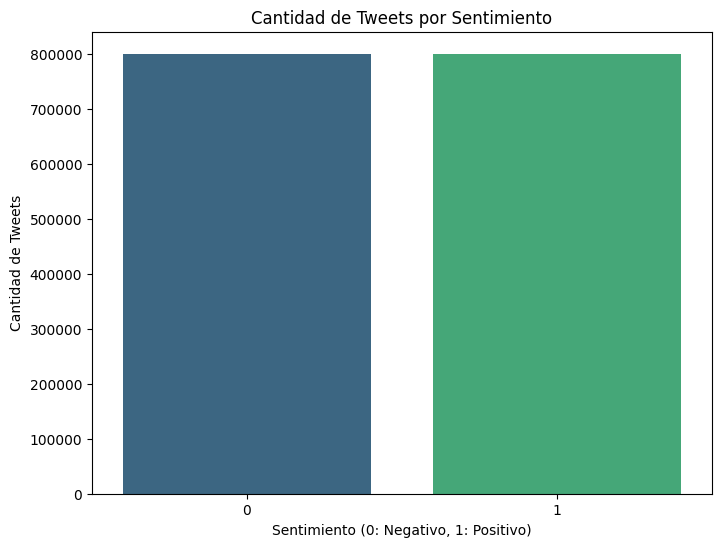

In [ ]:
import matplotlib.pyplot as plt
# Contar la cantidad de tweets por sentimiento
sentiment_counts = df['target'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Cantidad de Tweets por Sentimiento')
plt.xlabel('Sentimiento (0: Negativo, 1: Positivo)')
plt.ylabel('Cantidad de Tweets')
plt.show()

# **LIMPIEZA DE DATOS**

- Eliminar valores nulos
- Remover URLs
- Remover números
- Quitar signos de puntuación
- Eliminar las palabras de parada (stop words)





In [ ]:
df = df.dropna()

import re
df['text'] = df['text'].apply(lambda x: re.sub(r"http\S+", "", x))
df['text'] = df['text'].apply(lambda x: re.sub(r'\d+', '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,target,id,date,flag,user,text,tweet_length,word_count
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,switchfoot Awww thats bummer You shoulda got D...,115,19
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,upset cant update Facebook texting might cry r...,111,21
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,Kenichan I dived many times ball Managed save ...,89,18
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,whole body feels itchy like fire,47,10
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,nationwideclass behaving im mad I cant see,111,21


In [ ]:
# ver como quedo un solo twits despues de la limpieza
print(df['text'].iloc[0])

switchfoot Awww thats bummer You shoulda got David Carr Third Day D


**DISTRIBUCION DE LA LONGUITUD DE LOS TUITS DESPUES DE LA LIMPIEZA DE DATOS**

<Figure size 1000x600 with 0 Axes>

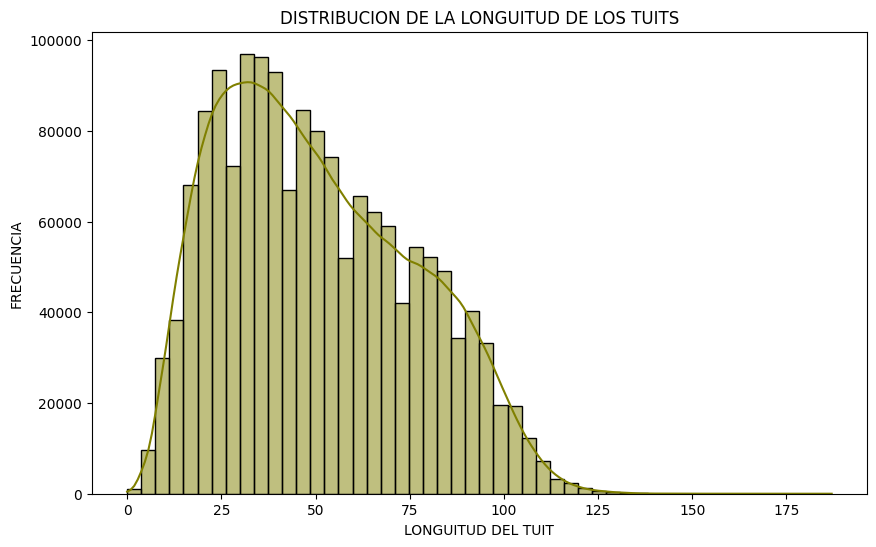

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna con la longitud de cada tuit
df['tweet_length'] = df['text'].apply(len)


plt.figure(figsize=(10, 6))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una columna con la longitud de cada tuit
df['tweet_length'] = df['text'].apply(len)


plt.figure(figsize=(10, 6))
sns.histplot(df['tweet_length'], bins=50, kde=True, color='olive')
plt.title('DISTRIBUCION DE LA LONGUITUD DE LOS TUITS')
plt.xlabel('LONGUITUD DEL TUIT')
plt.ylabel('FRECUENCIA')
plt.show()

**INTERPRETACIÓN:**

**Forma de distribución**

La forma de la gráfica es de una distribución asimétrica a la derecha.o
A medida que la longitud del tubo aumenta, la frecuencia de los tubos disminuye de manera constante.
- **Pico de la distribución :**
El pico de la distribución ocurre en torno a los 50 caracteres , lo que
- **Línea amarilla** (
La línea amarilla suavizada representa una estimación de la densidad de probabilidad d
La curva

- **Observaciones adicionales:**
A pesar de que los tuits más largos (más de 100 caracteres) son menos frecuentes. El gráfico también revela que hay pocos tuits extremadamente cortos (menos de 10 caracteres) o extremadamente largos (más de 150 caracteres).

**Conclusión :**
Revela que la mayoría de los tuits tienden a tener una longitud moderada (entre 25 y 75 caracteres), con un punto máximo en torno a los 50 caracteres. A medida que los tuits se vuelven más largos, la frecuencia con la que se escribe disminuye. Esto proporciona una visión general de cómo las personas utilizan los límites de caracteres de la plataforma de Twitter para expresar sus mensajes, tendiendo a optar por tuits que no sean ni demasiado cortos ni demas.

**DISTRIBUCION CANTIDAD DE PALABRAS EN LOS TUITS DESPUES DE LA LIMPIEZA DE LOS DATOS**

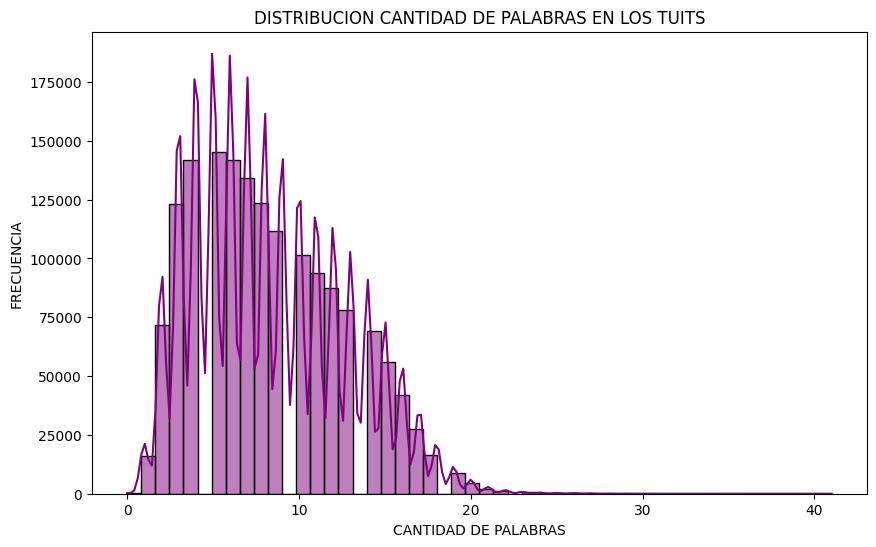

In [ ]:
# Contar las palabras en cada tuit
df['word_count'] = df['text'].apply(lambda x: len(x.split()))


plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='purple')
plt.title('DISTRIBUCION CANTIDAD DE PALABRAS EN LOS TUITS')
plt.xlabel('CANTIDAD DE PALABRAS')
plt.ylabel('FRECUENCIA')
plt.show()

**Interpretación:**

- **Mayoría de Tweets Cortos:** La gran mayoría de los tweets se concentran en la franja de 0 a 10 palabras. Esto sugiere que los usuarios tienden a expresar sus ideas de forma concisa y directa en esta plataforma.

- **Disminución Gradual de la Frecuencia:**A medida que aumenta el número de palabras, la frecuencia de los tweets disminuye de manera progresiva. Esto indica que a medida que los mensajes se alargan, son menos comunes.
- **Distribución Asimétrica:** La distribución es claramente asimétrica hacia la derecha, lo que significa que hay una cola larga de tweets con un número mayor de palabras. Sin embargo, estos tweets son una minoría en comparación con los más cortos.
- **Pico de Frecuencia:**El pico de frecuencia en un punto específico del eje X indica que existe un "punto dulce" en términos de longitud de los tweets. Los usuarios parecen encontrar este número de palabras como el más óptimo para transmitir sus mensajes.

**Conclusion:**

En base al análisis del gráfico, podemos concluir que la distribución de la cantidad de palabras en los tweets sigue un patrón característico, con una fuerte preferencia por los mensajes cortos. Esta tendencia tiene implicaciones importantes para la comunicación en esta red social y puede influir en la forma en que las marcas y las personas interactúan con ella.

## **NUBE DE PALABRAS**

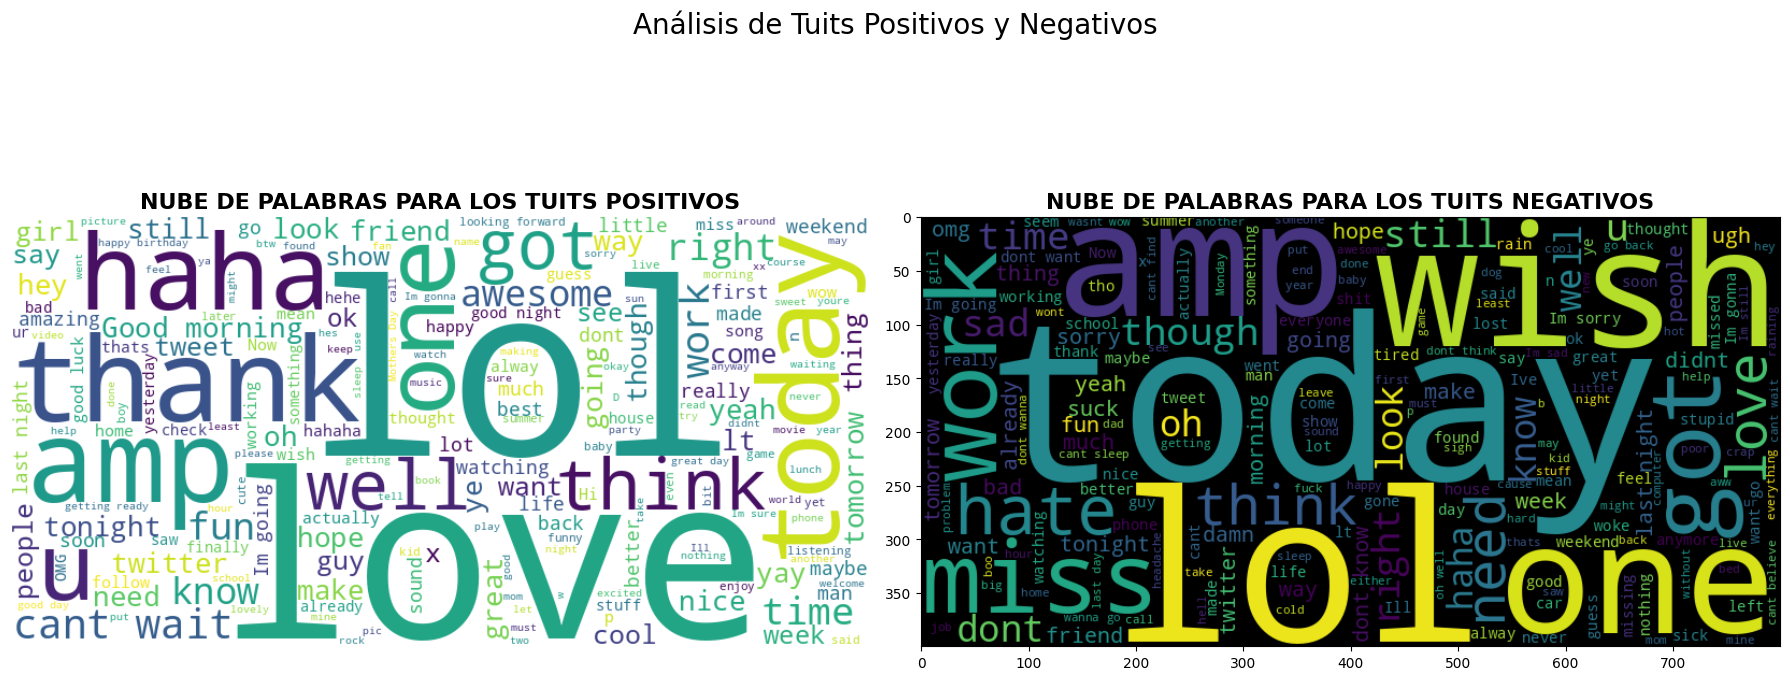

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Tweets positivos (target = 1) y negativos (target = 0)
# Se cambió el valor de 4 a 1 para positive_tweets
positive_tweets = df[df['target'] == 1]['text']
negative_tweets = df[df['target'] == 0]['text']

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(' '.join(negative_tweets))

plt.figure(figsize=(18, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('NUBE DE PALABRAS PARA LOS TUITS POSITIVOS', fontsize=16, fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('NUBE DE PALABRAS PARA LOS TUITS NEGATIVOS', fontsize=16, fontweight='bold')

plt.suptitle('Análisis de Tuits Positivos y Negativos', fontsize=20, y=1)

plt.tight_layout()
plt.show()

## **VECTORIZACION**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Ejemplo de datos
data = pd.Series(["Texto 1 para vectorizar",
                  "Texto 2 para vectorizar",
                  "Otro texto más para el ejemplo",
                  "Más textos que requieren vectorización",
                  "Y más texto para procesar..."])

# Definir el tamaño del lote
chunk_size = 100

vectorizer = TfidfVectorizer(max_features=5000)

def batch_vectorize(data, chunk_size, vectorizer):
    X = None
    for start in range(0, len(data), chunk_size):
        end = min(start + chunk_size, len(data))
        data_chunk = data[start:end]


        X_chunk = vectorizer.fit_transform(data_chunk)

        # Concatenar el resultado con los bloques anteriores
        if X is None:
            X = X_chunk
        else:
            X = sparse.vstack([X, X_chunk])
    return X


X = batch_vectorize(data, chunk_size, vectorizer)

print("Vectorización completa. Tamaño de la matriz resultante:")
print(X.shape)


Vectorización completa. Tamaño de la matriz resultante:
(5, 12)


Esta vectorización utilizando TfidfVectorizerdescikit-learnconvenir

El proceso de TF-IDF (Term Frequency-Inverse Document Frequency) pondera las palabras calculando en su frecuencia en el documento y en el corpus completo

Beneficios de TF-IDF:

- Da más peso a las palabras importantes dentro de un documento y menos a las palabras comunes que aparecen en muchos documentos (como artículos o
- Evita que las palabras comunes dominen el modelo, lo que puede suceder si simplemente contaras las palabras.

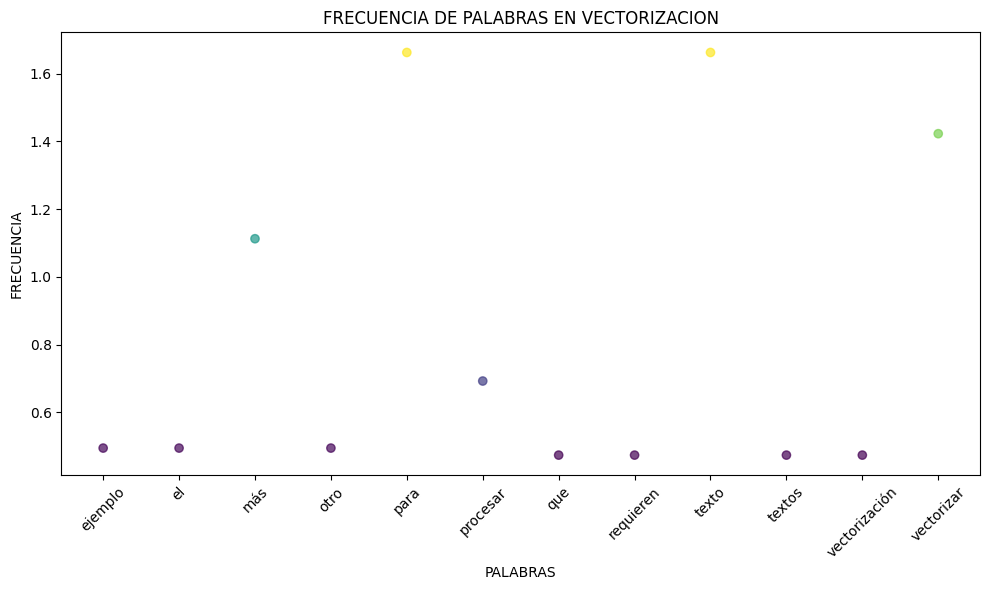

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener las frecuencias y nombres de las características
feature_names = np.array(vectorizer.get_feature_names_out())
frequencies = np.asarray(X.sum(axis=0)).flatten()

# Normalizar las frecuencias para asignar un mapa de colores
norm = plt.Normalize(frequencies.min(), frequencies.max())
colors = plt.cm.viridis(norm(frequencies))

plt.figure(figsize=(10, 6))
plt.scatter(feature_names, frequencies, c=colors, alpha=0.7)

plt.xlabel('PALABRAS')
plt.ylabel('FRECUENCIA')
plt.title('FRECUENCIA DE PALABRAS EN VECTORIZACION')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Entrenamiento del Primer Modelo (Regresión Logística)**

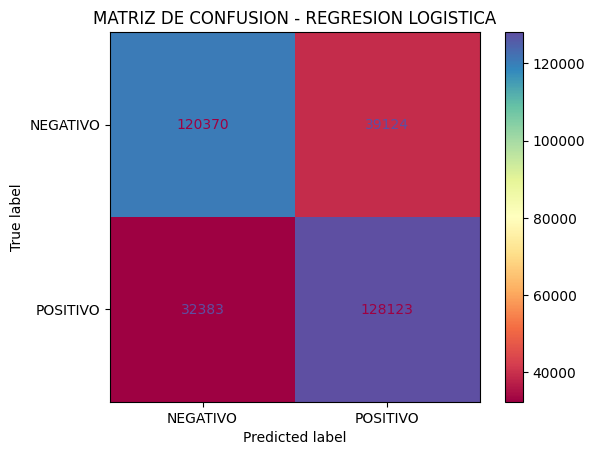

Reporte de Clasificación:
              precision    recall  f1-score   support

    NEGATIVO       0.79      0.75      0.77    159494
    POSITIVO       0.77      0.80      0.78    160506

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000

Exactitud del Modelo: 0.7765


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy import sparse

X_text = df['text']

vectorizer = TfidfVectorizer(max_features=5000)

# Vectorizamos los datos de texto
X_vect = vectorizer.fit_transform(X_text)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vect, df['target'], test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['NEGATIVO', 'POSITIVO'])
disp.plot(cmap='Spectral')
plt.title('MATRIZ DE CONFUSION - REGRESION LOGISTICA')
plt.show()

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['NEGATIVO', 'POSITIVO']))

accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del Modelo: {accuracy:.4f}")

1- **Precisión (Precision)**: Esto nos dice, de todas las veces que el modelo dijo "Positivo", ¿cuántas veces estuvo en lo correcto?

- Para "Negativo", el 79% de las veces que el modelo dijo "Negativo", estuvo correcto.

- Para "Positivo", el 77% de las veces que dijo "Positivo", acertó.

2- **Recall (Sensibilidad):** Mide, de todos los casos que en realidad son "Positivo", cuántos de ellos encontró el modelo?

- Para "Negativo", el modelo detectó correctamente el 75% de los casos que eran realmente "Negativo".
- Para "Positivo", encontró correctamente el 80% de los casos que eran realmente "Positivo".

3- **F1-Score:** Es un número que combina la precisión y el recall. Es útil cuando queremos ver un equilibrio entre ambos. Cuanto más cercano a 1, mejor.

- Para "Negativo", el equilibrio es 0.77.
- Para "Positivo", el equilibrio es 0.78.

4- **Support:**Es el número total de casos en el conjunto de datos.

- Hay 159,494 casos de "Negativo" y 160,506 de "Positivo".

5- **Accuracy (Exactitud):**En este caso, acertó el 78% de las veces.

6-**Macro Average (Promedio Macro)**: Es el promedio simple de precisión y recall, calculado para ambas clases sin importar si hay más casos de una clase que de otra. Aquí es 0.78.

7- **Weighted Average (Promedio Ponderado):** Es el promedio de precisión y recall teniendo en cuenta cuántos casos hay de cada clase. También es 0.78.

Finalmente, la Precisión del Modelo fue **77.64%**, lo que significa que el modelo acertó en el **77.64% **de sus predicciones totales,  el modelo está haciendo un buen trabajo, acertando cerca del 78% del tiempo y teniendo un equilibrio aceptable entre las predicciones correctas y los casos que encuentra de cada categoría.

- **Probar el modelo con un texto de ejemplo**

In [ ]:
texto_prueba = ["I didn't like the work"] # no me gusta el trabajo
texto_prueba_transformado = vectorizer.transform(texto_prueba)

prediccion_prueba = model.predict(texto_prueba_transformado)

if prediccion_prueba[0] == 1:
    print("El texto tiene un sentimiento positivo.")
else:
    print("El texto tiene un sentimiento negativo.")


El texto tiene un sentimiento negativo.


# **Entrenamiento del Segundo Modelo (Random Forest)**

Reporte de Clasificación - Random Forest:
              precision    recall  f1-score   support

    NEGATIVO       0.76      0.56      0.64    159494
    POSITIVO       0.65      0.83      0.73    160506

    accuracy                           0.69    320000
   macro avg       0.71      0.69      0.69    320000
weighted avg       0.71      0.69      0.69    320000

Exactitud del Modelo Random Forest: 0.6940


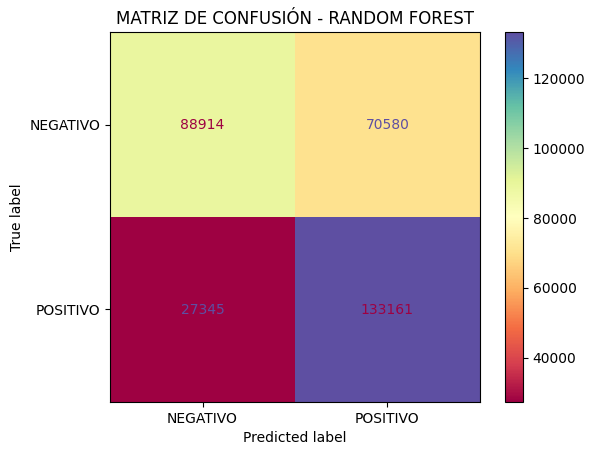

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

X_text = df['text']
y = df['target']

# Reducir la cantidad de características en la vectorización y agregar max_df y min_df
vectorizer = TfidfVectorizer(max_features=3000, max_df=0.95, min_df=5)  # Eliminar términos muy comunes y raros
X_vect = vectorizer.fit_transform(X_text)

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42)

# Optimizar Random Forest: reducción de estimadores y uso de paralelización
rf_model = RandomForestClassifier(n_estimators=50, max_features="sqrt", random_state=42, n_jobs=-1, max_depth=10, min_samples_split=5)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


print("Reporte de Clasificación - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['NEGATIVO', 'POSITIVO']))

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud del Modelo Random Forest: {accuracy_rf:.4f}")

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['NEGATIVO', 'POSITIVO'])
disp_rf.plot(cmap='Spectral')
plt.title('MATRIZ DE CONFUSIÓN - RANDOM FOREST')
plt.show()

**Precisión (Precision):**


- El modelo tiene una mejor precisión al clasificar "NEGATIVO" (0.75), lo que significa que cuando clasifica un caso como "NEGATIVO", tiene una probabilidad del 75% de estar en lo correcto.

- Para la clase "POSITIVO", la precisión es algo más baja (0.65), lo que indica que el modelo es menos preciso cuando predice "POSITIVO", es decir, tiene más falsos positivos en comparación con "NEGATIVO".

**Recuperación (Recall):**


- El recall para "NEGATIVO" es de 0.56, lo que significa que el modelo identifica correctamente solo el 56% de las instancias "NEGATIVO". Hay un alto número de falsos negativos para esta clase.

- El recall para "POSITIVO" es mucho mayor (0.82), lo que indica que el modelo identifica correctamente el 82% de las instancias "POSITIVO", lo cual es una tasa bastante buena.
**F1-Score:**


- El F1-score para "NEGATIVO" es de 0.64, lo que refleja un desempeño moderado en esta clase, debido a la baja recuperación y una precisión relativamente buena.

- Para "POSITIVO", el F1-score es más alto (0.73), lo que indica que el modelo tiene un mejor equilibrio entre precisión y recall en esta clase.

**Accuracy:Exactitud del Modelo: 0.6908 (69.08%)**

**Conclusiones:**

- **Buen desempeño general:** La mayoría de las muestras fueron clasificadas correctamente, como lo indican los altos valores en la diagonal principal.
- **Desequilibrio de clases:** Parece haber un desequilibrio entre las clases "NEGATIVO" y "POSITIVO". La clase "POSITIVO" tiene una mayor cantidad de muestras clasificadas correctamente.
- **Falsos positivos:** El modelo tiene una tendencia a clasificar muestras como "POSITIVO" cuando en realidad son "NEGATIVO" (70,000 casos).
- **Falsos negativos:** El modelo también tiene un número significativo de falsos negativos (29,312), lo que significa que clasificó algunas muestras como "NEGATIVO" cuando en realidad eran "POSITIVO".

- **Probar el modelo con un texto de ejemplo**

In [ ]:
texto_prueba = ["Thank you, I feel happy"] #Gracias, me siento feliz

texto_prueba_transformado = vectorizer.transform(texto_prueba)


prediccion_prueba = rf_model.predict(texto_prueba_transformado)

print(f"Predicción cruda: {prediccion_prueba[0]}")

if prediccion_prueba[0] == 1:
    print("El texto tiene un sentimiento positivo.")
else:
    print("El texto tiene un sentimiento negativo.")


Predicción cruda: 1
El texto tiene un sentimiento positivo.


**Análisis Comparativo entre ambos modelos**

- **Precisión:**La Regresión Logística tiene una mejor precisión tanto para la clase "NEGATIVO" (79% vs. 75%) como para la clase "POSITIVO" (77% vs. 65%) que el Random Forest. Esto significa que el modelo de regresión logística es más confiable cuando se trata de clasificar correctamente los textos como negativos o positivos.

- **Recall:**El Random Forest tiene un mejor recall para la clase "POSITIVO" (82% vs. 80%), lo que significa que es ligeramente mejor en identificar los textos positivos. Sin embargo, el Random Forest tiene un recall mucho más bajo para los textos negativos (56% vs. 75%), lo que indica que es peor para identificar correctamente los textos negativos.

- **F1-Score:** El Random Forest tiene un F1-score superior en la clase "POSITIVO" (73% vs. 78% para la regresión logística), pero la Regresión Logística tiene un F1-score más equilibrado en general, con mejor desempeño tanto para las clases negativas como positivas (77% y 78%, respectivamente, frente a 64% y 73% del Random Forest).

- **Exactitud:** En cuanto a la exactitud, la Regresión Logística es superior con un 78%, frente al 69% del Random Forest. Esto significa que la regresión logística realiza un mejor trabajo general en la clasificación correcta de los textos.

**Conclusión:**

- Random Forest tiene un buen desempeño en términos de recall para la clase positiva, pero su desempeño es menos equilibrado, ya que tiene un bajo recall para la clase negativa.

- Regresión Logística muestra un mejor equilibrio en todas las métricas (precisión, recall, y F1-score) y tiene un mejor desempeño general en términos de exactitud.